      3       2
-0.5 x + 1.5 x + 2.776e-16 x + 1


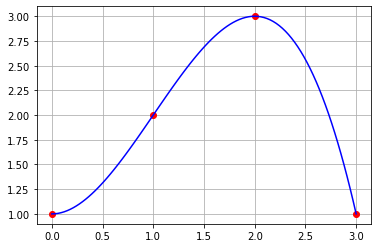

In [3]:
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt

# もとの点
x = np.array([0,1,2,3])
y = np.array([1,2,3,1])
for i in range(0,4):
    plt.plot(x[i],y[i],'o',color='r')


# Lagrange補間
f = interpolate.lagrange(x,y)
print(f)
x = np.linspace(0,3, 100)
y = f(x)
plt.plot(x, y, color = 'b')

plt.grid()
plt.show()

[1 1 0 0]


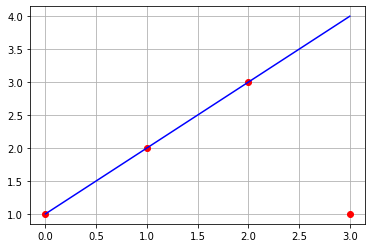

In [4]:
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt

def _poly_newton_coefficient(x,y):
    """
    x: list or np array contanining x data points
    y: list or np array contanining y data points
    """

    m = len(x)

    x = np.copy(x)
    a = np.copy(y)
    for k in range(1,m):
#        print(a[k:m], a[k-1], x[k:m], x[k-1])
        a[k:m] = (a[k:m] - a[k-1])/(x[k:m] - x[k-1])

    return a

def newton_polynomial(x_data, y_data, x):
    """
    x_data: data points at x
    y_data: data points at y
    x: evaluation point(s)
    """
    a = _poly_newton_coefficient(x_data, y_data)
    n = len(x_data) - 1 # Degree of polynomial
    p = a[n]
    for k in range(1,n+1):
        p = a[n-k] + (x -x_data[n-k])*p
#        print(p)
    return p

# もとの点
x = np.array([0,1,2,3])
y = np.array([1,2,3,1])
for i in range(0,4):
    plt.plot(x[i],y[i],'o',color='r')


print(_poly_newton_coefficient(x,y))

xx = np.linspace(0,3, 100)
yy = newton_polynomial(x, y, xx)
plt.plot(xx, yy, color = 'b')

plt.grid()
plt.show()

In [2]:
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt

def _poly_newton_coefficient(x,y):

    m = len(x)
    x = np.copy(x)
    a = np.copy(y)
    
    for k in range(1,m):
        a[k:m] = (a[k:m] - a[k-1])/(x[k:m] - x[k-1])
    return a[k:m]

def newton_polynomial(x_data, y_data, x):
    """
    x_data: data points at x
    y_data: data points at y
    x: evaluation point(s)
    """
    a = _poly_newton_coefficient(x_data, y_data)
    n = len(x_data) - 1 # Degree of polynomial
    p = a[n]
    for k in range(1,n+1):
        p = a[n-k] + (x -x_data[n-k])*p
    return p

# もとの点
x = np.array([8.0,9.0,10.0])
y = np.array([2.079442, 2.197225, 2.302585])

#for i in range(0,4):
#    plt.plot(x[i],y[i],'o',color='r')


print(_poly_newton_coefficient(x,y))

#xx = np.linspace(8,11, 100)
#yy = newton_polynomial(x, y, xx)
#plt.plot(xx, yy, color = 'b')

#plt.grid()
#plt.show()


[-0.0062115]


In [3]:
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt

def _poly_newton_coefficient(x,y,m):

#    m = len(x)
    x = np.copy(x)
    a = np.copy(y)
    
    for k in range(1,m):
        a[k:m] = (a[k:m] - a[k-1])/(x[k:m] - x[k-1])
    return a[k:m]

def first_newton(x,y,x1):
    f1 = _poly_newton_coefficient(x,y,2)
    f = (x0- x[0])*f1
    return f

def second_newton(x,y,x1):
    f2 = _poly_newton_coefficient(x,y,3)
    f = (x0 - x[0])*(x0 - x[1])*f2
    return f

# もとの点
x = np.array([8.0,9.0,10.0])
y = np.array([2.079442, 2.197225, 2.302585])
x0 = 9.2
x1 = first_newton(x,y,x0)
x2 = second_newton(x,y,x0)

result = x0 + x1 + x2
print(result)


[9.33984884]


In [62]:
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt
from decimal import *

def _poly_newton_coefficient(x,y,m):

#    m = len(x)
    x = np.copy(x)
    a = np.copy(y)
    
    for k in range(1,m):
        a[k:m] = (a[k:m] - a[k-1])/(x[k:m] - x[k-1])
#        print(k, a[k:m], a[k-1], x[k:m], x[k-1])
    return a[k:m]

def first_newton(x,y,x1):
    f1 = _poly_newton_coefficient(x,y,2)
    f = (x0- x[0])*f1
    return f

def second_newton(x,y,x1):
    f2 = _poly_newton_coefficient(x,y,3)
    f = (x0 - x[0])*(x0 - x[1])*f2
    return f

def third_newton(x,y,x1):
    f3 = _poly_newton_coefficient(x,y,4)
    f = (x0 - x[0])*(x0 - x[1])*(x0 - x[2])*f3
    return f

# もとの点
x = np.array([8.0,9.0,10.0,11.0])
y = np.array([2.079442, 2.197225, 2.302585, 2.397895])
x0 = 9.2
x1 = first_newton(x,y,x0)
x2 = second_newton(x,y,x0)
x3 = third_newton(x,y,x0)

result = x0 + x1 + x2 + x3

print(result)

[9.3397729]


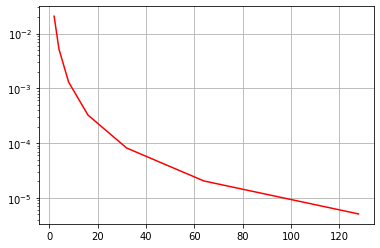

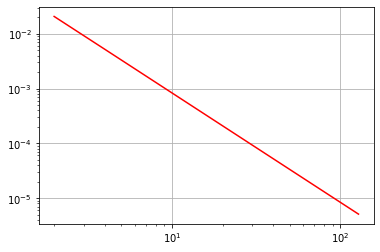

In [64]:
import numpy as np

def func(x):
    return 4.0/(1.0+x**2)

def mid(N):
    x0, xn = 0.0, 1.0

    h = (xn-x0)/N
    S = 0.0
    for i in range(0, N):
        xi = x0 + (i+0.5)*h
        dS = h * func(xi)
        S = S + dS
    return S

x, y = [], []
for i in range(1,8):
    x.append(2**i)
    y.append(abs(mid(2**i)-np.pi))
    
plt.plot(x, y, color = 'r')
plt.yscale('log')
plt.grid()
plt.show()

plt.plot(x, y, color = 'r')
plt.yscale('log')
plt.xscale('log')
plt.grid()
plt.show()

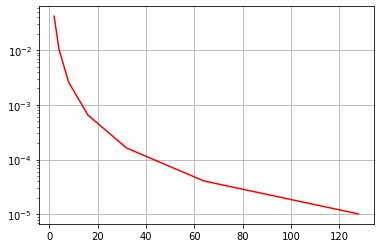

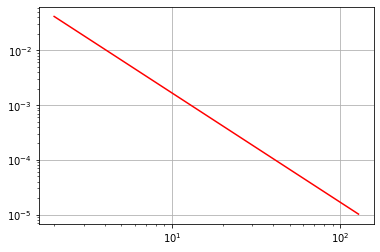

中点則で100区間に分けたときのdxとの差は、台形則で120区間分けたときよりも小さい。
よって中点則の方が区間数が少なくても台形則よりも精度が高く優れていると言える。


In [75]:
def func(x):
    return 4.0/(1.0+x**2)

def trap(N):
    x0, xn =0.0, 1.0

    h = (xn-x0)/N
    S = func(x0)/2.0
    for i in range(1, N):
        xi = x0 + i*h
        dS = func(xi)
        S = S + dS

    S = S + func(xn)/2.0
    return S*h

x, y = [], []
for i in range(1,8):
    x.append(2**i)
    y.append(abs(trap(2**i)-np.pi))
    
plt.plot(x, y, color = 'r')
plt.yscale('log')
plt.grid()
plt.show()

plt.plot(x, y, color = 'r')
plt.yscale('log')
plt.xscale('log')
plt.grid()
plt.show()

print('中点則で100区間に分けたときのdxとの差は、台形則で120区間分けたときよりも小さい。')
print('よって中点則の方が区間数が少なくても台形則よりも精度が高く優れていると言える。')